In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import merge
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

## 获取文件列表

# 1、导入数据

In [2]:
# 初始化股票历史数据函数
def import_data(stock_name, flag):
    # 导入数据, 上级目录的平行目录要用..
    df = pd.read_csv('D:\\stock\\StockData\\163\day_20200110\\000000标题副本.csv')
    
    df.to_csv('..\\JN_DataWarehouse\\stock_analysis\\'+stock_name)
    df.head()
    
    path = "D:\\stock\\StockData\\163\day_20200110"
    dirs = os.listdir( path )

    # 输出所有文件和文件夹,并合并df, 600000读取时用encoding='gbk'
    for file in dirs:
        if file != '000000标题副本.csv' and file[0] == flag and file != '600000.csv' and file != '601318下载语句.txt':
            print(file)    
            df1 = pd.read_csv('D:\\stock\\StockData\\163\day_20200110\\'+file)

            #df1 = df1.loc[df.日期>='2011-01-01']
            #df = concat([df,df1],ignore_index=True).drop_duplicates()
            df1.to_csv('..\\JN_DataWarehouse\\stock_analysis\\'+stock_name, mode='a', header=False)
    
    # 特殊处理600000
    if flag == '6':
        dfc = pd.read_csv('D:\\stock\\StockData\\163\day_20200110\\600000.csv',encoding='gbk')
        dfc.to_csv('..\\JN_DataWarehouse\\stock_analysis\\sh-stock.csv', mode='a', header=False)

In [3]:
def save_data(df, stock_name, flag):
    df.to_csv('..\\JN_DataWarehouse\\stock_analysis\\'+stock_name)

In [4]:
def read_data(stock_name, flag):
    df = pd.read_csv('..\\JN_DataWarehouse\\stock_analysis\\'+stock_name, index_col=False)
    return df

In [ ]:
# 初始化时才打开
#import_data('sz-stock.csv','0')
#import_data('cy-stock.csv','3')
import_data('sh-stock.csv','6')

In [4]:
df = pd.read_csv('..\\JN_DataWarehouse\\stock_analysis\\sh-stock.csv')
df.info()

D:\Program Files (x86)\Anaconda3\envs\tf2g\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459000 entries, 0 to 4458999
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   日期          object 
 2   股票代码        object 
 3   名称          object 
 4   收盘价         float64
 5   最高价         float64
 6   最低价         float64
 7   开盘价         float64
 8   前收盘         float64
 9   涨跌额         object 
 10  涨跌幅         object 
 11  换手率         object 
 12  成交量         float64
 13  成交金额        float64
 14  总市值         float64
 15  流通市值        float64
dtypes: float64(9), int64(1), object(6)
memory usage: 544.3+ MB


In [5]:
df2 = df.loc[(df.日期>='2000-01-01')&(df.股票代码 == '\'600000')]
df2.count()

Unnamed: 0    4854
日期            4854
股票代码          4854
名称            4854
收盘价           4854
最高价           4854
最低价           4854
开盘价           4854
前收盘           4854
涨跌额           4854
涨跌幅           4854
换手率           4854
成交量           4854
成交金额          4854
总市值           4854
流通市值          4854
dtype: int64

# 2 异常数据处理

## 2.1 重复值处理

In [6]:
# 查看总行数
df.shape

(4459000, 16)

In [12]:
# 检查重复值
df.duplicated().sum()

0

In [8]:
#显示重复值的数据
df[df.duplicated()]

,Unnamed: 0,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [6]:
# 删除表中的重复值的数据
df.drop_duplicates(inplace=True)

In [7]:
# 检查去掉的重复值
df.duplicated().sum()

0

In [9]:
# 查看总行数，去掉重复后，行数会变化
df.shape

(4459000, 16)

In [14]:
# 重新排序，重新索引
df.index=range(df.shape[0])

In [15]:
df.index
print(df.head())

           日期     股票代码    名称  收盘价  最高价  最低价  开盘价   前收盘  涨跌额  涨跌幅  换手率  成交量  \
0  2009-12-29  '600001  邯郸钢铁  0.0  0.0  0.0  0.0  5.29  0.0  0.0  0.0  0.0   
1  2009-12-28  '600001  邯郸钢铁  0.0  0.0  0.0  0.0  5.29  0.0  0.0  0.0  0.0   
2  2009-12-25  '600001  邯郸钢铁  0.0  0.0  0.0  0.0  5.29  0.0  0.0  0.0  0.0   
3  2009-12-24  '600001  邯郸钢铁  0.0  0.0  0.0  0.0  5.29  0.0  0.0  0.0  0.0   
4  2009-12-23  '600001  邯郸钢铁  0.0  0.0  0.0  0.0  5.29  0.0  0.0  0.0  0.0   

   成交金额           总市值          流通市值  
0   0.0  1.489906e+10  1.489906e+10  
1   0.0  1.489906e+10  1.489906e+10  
2   0.0  1.489906e+10  1.489906e+10  
3   0.0  1.489906e+10  1.489906e+10  
4   0.0  1.489906e+10  1.489906e+10  


In [11]:
# 删除index=0的 test值
df.drop(0,inplace=True)

In [12]:
# 删除 列
del df['Unnamed: 0']

## 2.2 异常值处理

In [14]:
# 查看异常数据,只对数值型有效
df.describe().T

,count,mean,std,min,25%,50%,75%,max
收盘价,4458998.0,1.226466e+01,1.558694e+01,0.00,5.650000e+00,9.060000e+00,1.464000e+01,1.233750e+03
最高价,4458998.0,1.250707e+01,1.586670e+01,0.00,5.760000e+00,9.220000e+00,1.493000e+01,1.241610e+03
最低价,4458998.0,1.200991e+01,1.528774e+01,0.00,5.540000e+00,8.880000e+00,1.435000e+01,1.228060e+03
开盘价,4458998.0,1.224730e+01,1.555895e+01,0.00,5.650000e+00,9.050000e+00,1.462000e+01,1.231000e+03
前收盘,4458998.0,1.280208e+01,1.558402e+01,0.13,6.060000e+00,9.390000e+00,1.500000e+01,1.233750e+03
成交量,4458993.0,1.153555e+07,3.599005e+07,0.00,1.097713e+06,3.676956e+06,1.031098e+07,5.109897e+09
成交金额,4458993.0,1.255065e+08,3.967822e+08,0.00,9.612077e+06,3.576920e+07,1.089335e+08,6.999139e+10
总市值,4458991.0,1.933745e+10,9.999144e+10,0.00,2.282700e+09,4.439064e+09,1.009026e+10,8.045602e+12
流通市值,4458989.0,1.182119e+10,6.045182e+10,0.00,1.092845e+09,2.730767e+09,6.795600e+09,2.372158e+12


In [ ]:
# 案例1 假设收盘价有某行值偏离异常（过大或过小），只可以使用本公式发现
sta=(df['收盘价']-df['收盘价'].mean())/df['收盘价'].std()
df[sta.abs()>4]

In [13]:
# 案例2
df[df.收盘价 > df.最高价]

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [14]:
#合并 案例1 和 案例2 查看异常数据
pd.concat([df[df.收盘价 > df.最高价],df[sta.abs()>4]])

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [15]:
# 删除异常数据
delindex=pd.concat([df[df.收盘价 > df.最高价],df[sta.abs()>4]]).index
df.drop(delindex,inplace=True)

In [15]:
#查看是否有删除数据，如有要重做索引
df.shape

(4458999, 15)

## 2.3 缺失值，None值处理

In [16]:
# 检验空值 isnull() , notnull()
df.isnull().sum()

日期       0
股票代码     0
名称       1
收盘价      1
最高价      1
最低价      1
开盘价      1
前收盘      1
涨跌额      3
涨跌幅      4
换手率      4
成交量      6
成交金额     6
总市值      8
流通市值    10
dtype: int64

In [21]:
# 缺失值筛查
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_pct = 100 * mis_val/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_pct], axis=1)
    mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'}, inplace=True)
    mis_val_table = mis_val_table[mis_val_table.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    return mis_val_table
missing_loan = missing_values_table(df)
missing_loan

,Missing Values,% of Total Values


In [20]:
# 检查是否含有None
#df.groupby(['涨跌额'])['涨跌额'].count()

df.loc[df.涨跌幅=='None','涨跌幅'] =0
df.loc[df.涨跌额=='None','涨跌额'] =0
df.loc[df.涨跌幅.isnull(),'涨跌幅'] =0
df.loc[df.涨跌额.isnull(),'涨跌额'] =0
df.loc[df.流通市值.isnull(),'流通市值'] =0
df.loc[df.总市值.isnull(),'总市值'] =0
df.loc[df.成交量.isnull(),'成交量'] =0
df.loc[df.成交金额.isnull(),'成交金额'] =0
df.loc[df.换手率.isnull(),'换手率'] =0
df.loc[df.股票代码=="'600001",'名称'] ='邯郸钢铁'

In [19]:
# 根据索引删除异常
df.drop(694032,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459000 entries, 0 to 4458999
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   日期          object 
 2   股票代码        object 
 3   名称          object 
 4   收盘价         float64
 5   最高价         float64
 6   最低价         float64
 7   开盘价         float64
 8   前收盘         float64
 9   涨跌额         object 
 10  涨跌幅         object 
 11  换手率         object 
 12  成交量         float64
 13  成交金额        float64
 14  总市值         float64
 15  流通市值        float64
dtypes: float64(9), int64(1), object(6)
memory usage: 544.3+ MB


In [ ]:
# 改变索引
df = df.set_index("日期")
df.loc['2020-04-22']

In [ ]:
# 恢复索引
df = df.reset_index()
df.head(5)

In [24]:
# 展示所有列
print('df',df.columns)

df Index(['日期', '股票代码', '名称', '收盘价', '最高价', '最低价', '开盘价', '前收盘', '涨跌额', '涨跌幅',
       '换手率', '成交量', '成交金额', '总市值', '流通市值'],
      dtype='object')


In [16]:
save_data(df,'sh-stock1.csv','6')

## 2.4 去掉乱码字符

In [19]:
df = read_data('sh-stock1.csv','6')


D:\Program Files (x86)\Anaconda3\envs\tf2g\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [20]:
df.head(10)

,Unnamed: 0,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,0,2009-12-29,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10
1,1,2009-12-28,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10
2,2,2009-12-25,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10
3,3,2009-12-24,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10
4,4,2009-12-23,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10
5,5,2009-12-22,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10
6,6,2009-12-21,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10
7,7,2009-12-18,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10
8,8,2009-12-17,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10
9,9,2009-12-16,'600001,邯郸钢铁,0.0,0.0,0.0,0.0,5.29,0.0,0.0,0.0,0.0,0.0,1.489906e+10,1.489906e+10


In [8]:
dfc = df.loc[df.股票代码=="'600001"] 
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 2412
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2413 non-null   int64  
 1   日期          2413 non-null   object 
 2   股票代码        2413 non-null   object 
 3   名称          2413 non-null   object 
 4   收盘价         2413 non-null   float64
 5   最高价         2413 non-null   float64
 6   最低价         2413 non-null   float64
 7   开盘价         2413 non-null   float64
 8   前收盘         2413 non-null   float64
 9   涨跌额         2413 non-null   float64
 10  涨跌幅         2413 non-null   float64
 11  换手率         2413 non-null   object 
 12  成交量         2413 non-null   float64
 13  成交金额        2413 non-null   float64
 14  总市值         2413 non-null   float64
 15  流通市值        2413 non-null   float64
dtypes: float64(11), int64(1), object(4)
memory usage: 320.5+ KB


# 3、分析数据

In [23]:
#pd.set_option('display.max_rows',2000)
df_copy = df.loc[df["名称"]==('浦发银行')].head(10000)
# '涨跌幅'原来是str 先转换成 float ，后面才能与0比较
df_copy['涨跌幅'] = df_copy['涨跌幅'].astype('float')
df_copy.loc[df_copy.涨跌幅>0,['日期','涨跌幅']].head()

,日期,涨跌幅
4454145,2020-1-13,0.1614
4454146,2020-1-10,0.1617
4454147,2020-1-9,0.4058
4454149,2020-1-7,0.3210
4454151,2020-1-3,1.0425


In [24]:
# loc查看数据
df_copy.loc[df.日期 > '2020-04-10',['日期','股票代码','收盘价','涨跌幅']]

,日期,股票代码,收盘价,涨跌幅
4454145,2020-1-13,'600000,12.41,0.1614
4454146,2020-1-10,'600000,12.39,0.1617
4454147,2020-1-9,'600000,12.37,0.4058
4454148,2020-1-8,'600000,12.32,-1.4400
4454149,2020-1-7,'600000,12.50,0.3210
4454150,2020-1-6,'600000,12.46,-1.1111
4454151,2020-1-3,'600000,12.60,1.0425
4454152,2020-1-2,'600000,12.47,0.8084


In [44]:
# query 查看数据
df2 = df_copy.query("日期 > '2020-02-10'")[['日期','股票代码','收盘价','涨跌幅']].head(50) 

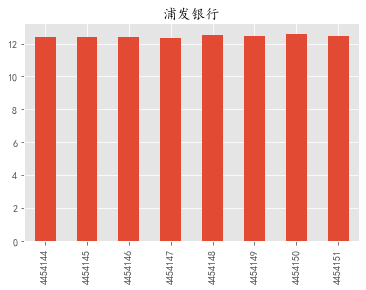

In [52]:
plt.style.use('ggplot')
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

df2.groupby('日期')['收盘价'].max().reset_index()
df2['收盘价'].sort_index().plot(kind='bar', title=u'浦发银行')
plt.show()


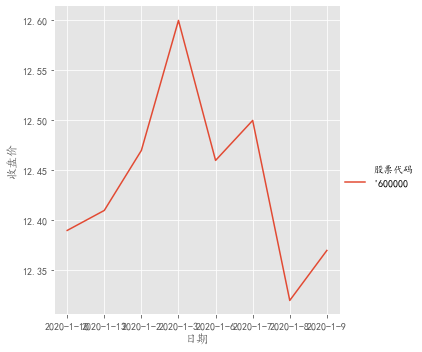

In [58]:
sns.relplot(x= "日期", y= "收盘价", hue= "股票代码", kind= "line", data=df2)
plt.show()

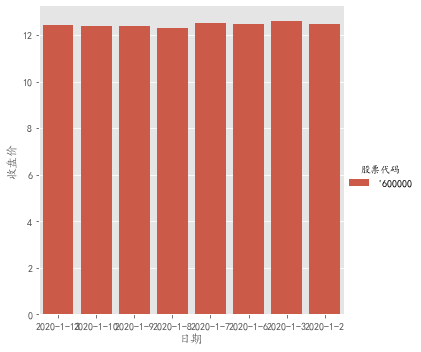

In [53]:
sns.catplot(x= u"日期", y= u"收盘价",hue= u"股票代码", kind= "bar", data=df2)
plt.show()

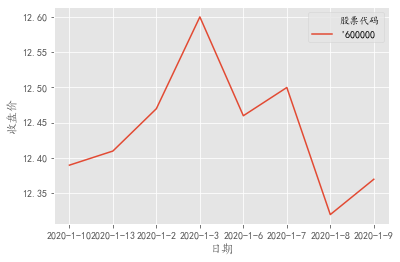

In [54]:
sns.lineplot(x=u"日期", y=u"收盘价",hue=u"股票代码", data=df2)
plt.show()

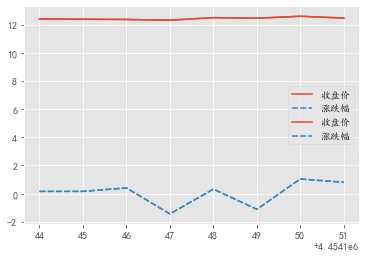

In [56]:
# 两条线在一个图上显示
list_data = [df2.loc[:, "收盘价"], df2.loc[:, "涨跌幅"]]

ax = sns.lineplot(data=list_data)
plt.show()

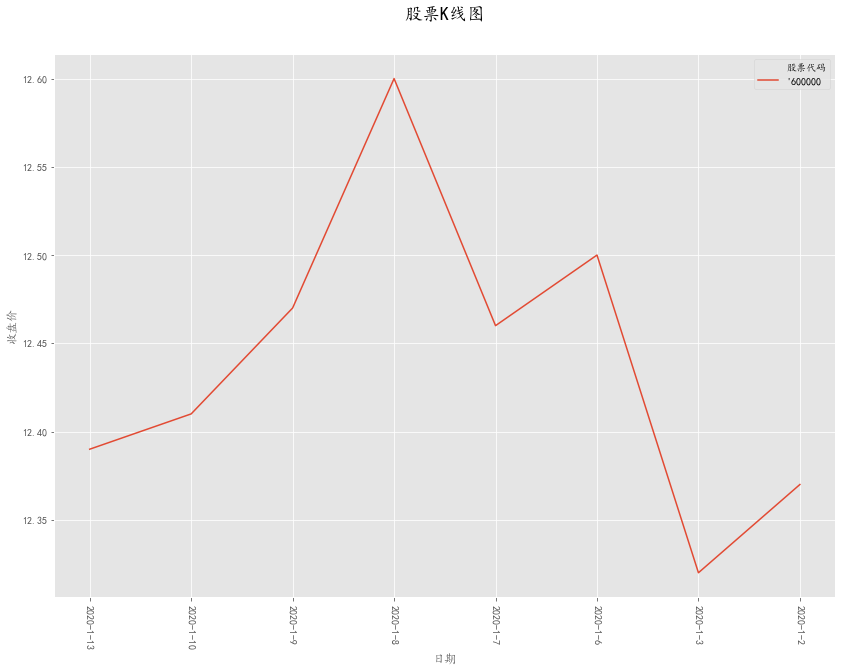

In [57]:
f, ax = plt.subplots(figsize = (14, 10))

# 设置颜色
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)

# color: https://matplotlib.org/users/colormaps.html
sns.lineplot(x=u"日期", y=u"收盘价",hue=u"股票代码", data=df2, ax=ax)

ax.set_title('股票K线图', fontsize=18, position=(0.5,1.05))

#ax.tick_params(axis=u"日期",labelsize=6, colors='b', labeltop=False, labelbottom=False) 
ax.set_xticklabels(df2['日期'], rotation=-90)
plt.show()